# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame
merged = pd.merge(mouse_metadata,study_results,"inner")
print(merged.head())

# Display the data table for preview


  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [3]:
# Checking the number of mice.
merged["Mouse ID"].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged["Duplicate"] = merged.duplicated(subset=['Mouse ID','Timepoint'],keep=False)


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
merged.loc[merged['Duplicate'] == True]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
908,g989,Propriva,Female,21,26,0,45.000000,0,True
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
merged.drop(['Duplicate'],axis=1)
print(merged.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  Duplicate  
0           45.000000                 0      False  
1           38.825898                 0      False  
2           35.014271                 1      False  
3           34.223992                 1      False  
4           32.997729                 1      False  


In [7]:
# Checking the number of mice in the clean DataFrame.
merged["Mouse ID"].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
merged.describe()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_dataframe = pd.DataFrame()
mean = merged.groupby(merged["Drug Regimen"]).mean()
median = merged.groupby(merged["Drug Regimen"]).median()
variance = merged.groupby(merged["Drug Regimen"]).var()
std = merged.groupby(merged["Drug Regimen"]).std()
count = merged.groupby(merged["Drug Regimen"]).count()
SEM = std/count



summary_dataframe["Mean"] = mean["Tumor Volume (mm3)"]
summary_dataframe["Mediam"] = median["Tumor Volume (mm3)"]
summary_dataframe["variance"] = variance["Tumor Volume (mm3)"]
summary_dataframe["std"] = std["Tumor Volume (mm3)"]
summary_dataframe["SEM"] = SEM["Tumor Volume (mm3)"]

print(summary_dataframe)


                   Mean     Mediam   variance       std       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.021716
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.035215
Infubinol     52.884795  51.820584  43.128684  6.567243  0.036895
Ketapril      55.235638  53.698743  68.553577  8.279709  0.044041
Naftisol      54.331565  52.509285  66.173479  8.134708  0.043735
Placebo       54.033581  52.288934  61.168083  7.821003  0.043210
Propriva      52.322552  50.854632  42.351070  6.507770  0.040421
Ramicane      40.216745  40.673236  23.486704  4.846308  0.021256
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.042599
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.038278


/var/folders/7k/6nnx_jrs1kj7qg39rwhwdr180000gn/T/ipykernel_47596/2916825964.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean = merged.groupby(merged["Drug Regimen"]).mean()
/var/folders/7k/6nnx_jrs1kj7qg39rwhwdr180000gn/T/ipykernel_47596/2916825964.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median = merged.groupby(merged["Drug Regimen"]).median()
/var/folders/7k/6nnx_jrs1kj7qg39rwhwdr180000gn/T/ipykernel_47596/2916825964.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify nume

In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_dataframe = pd.DataFrame()

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = merged.groupby(merged["Drug Regimen"]).agg(['mean','median','std','var','sem'])

summary_table['Tumor Volume (mm3)']

/var/folders/7k/6nnx_jrs1kj7qg39rwhwdr180000gn/T/ipykernel_47596/962073661.py:6: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary_table = merged.groupby(merged["Drug Regimen"]).agg(['mean','median','std','var','sem'])


,mean,median,std,var,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.322552,50.854632,6.507770,42.351070,0.512884
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

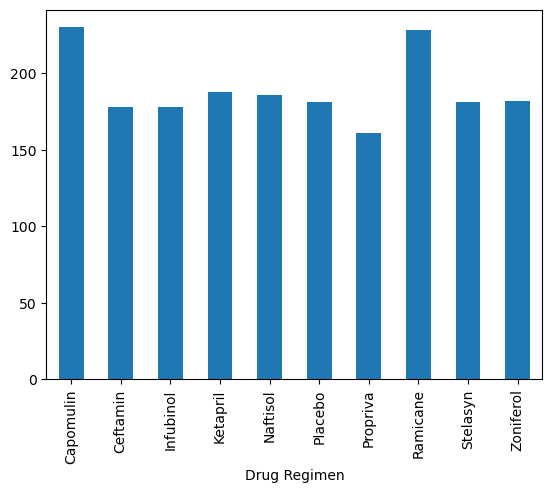

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plotframe = merged.groupby("Drug Regimen")["Mouse ID"].count()
bar = plotframe.plot.bar(x = 'keys',y = 'values')


Text(0, 0.5, 'Number of Mice')

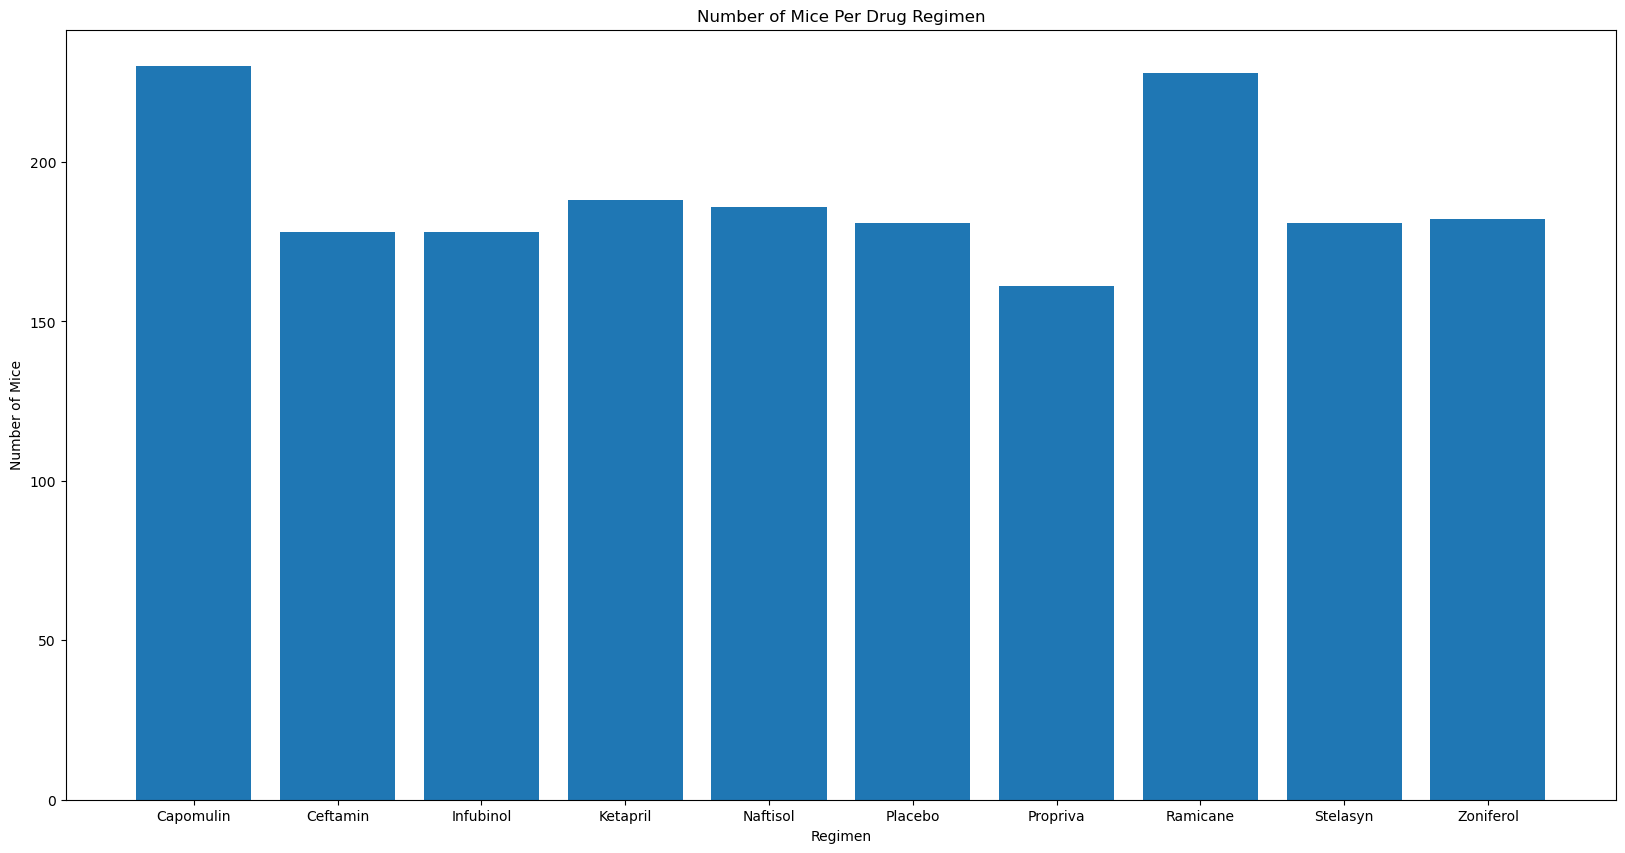

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(merged["Drug Regimen"].unique()))
counts = merged.groupby("Drug Regimen")["Mouse ID"].count()
y_axis = [value for value in counts]
labels = counts.keys()
plt.figure(figsize=(20,10))
plt.bar(x_axis,y_axis,alpha=1.0,align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,labels)
plt.title("Number of Mice Per Drug Regimen")
plt.xlabel("Regimen")
plt.ylabel("Number of Mice")

<Axes: title={'center': 'Mouse Count by Gender'}>

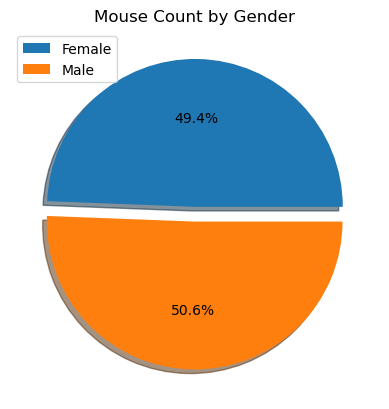

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
plotframe = merged.groupby("Sex")["Mouse ID"].count()
plotframe.plot(kind="pie", autopct='%1.1f%%', shadow=True, explode=[0.05, 0.05], legend=True, title='Mouse Count by Gender', ylabel='', labeldistance=None)

Text(0.5, 1.0, 'Mouse Count by Gender')

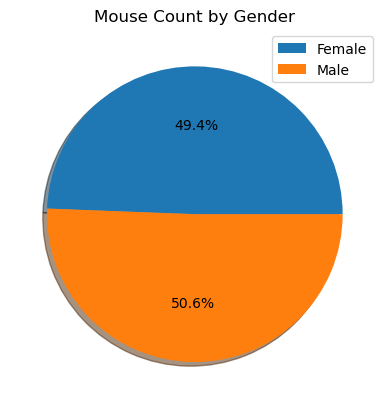

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(x=plotframe,autopct='%1.1f%%',shadow=True)
plt.legend(plotframe.keys())
plt.title("Mouse Count by Gender")

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
finalpoints = merged.loc[merged.reset_index().groupby(['Mouse ID'])['Timepoint'].idxmax()]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

Final_Frame = pd.merge(merged,finalpoints,how='left',on='Mouse ID')
Final_Frame = Final_Frame[['Mouse ID','Drug Regimen_x','Age_months_x','Weight (g)_x','Timepoint_x','Tumor Volume (mm3)_x','Tumor Volume (mm3)_y']]
Final_Frame = Final_Frame.rename(columns ={'Tumor Volume (mm3)_y':'Final Tumor Volume','Timepoint_x':'Timepoint'})
print(Final_Frame)




     Mouse ID Drug Regimen_x  Age_months_x  Weight (g)_x  Timepoint  \
0        k403       Ramicane            21            16          0   
1        k403       Ramicane            21            16          5   
2        k403       Ramicane            21            16         10   
3        k403       Ramicane            21            16         15   
4        k403       Ramicane            21            16         20   
...       ...            ...           ...           ...        ...   
1888     z969       Naftisol             9            30         25   
1889     z969       Naftisol             9            30         30   
1890     z969       Naftisol             9            30         35   
1891     z969       Naftisol             9            30         40   
1892     z969       Naftisol             9            30         45   

      Tumor Volume (mm3)_x  Final Tumor Volume  
0                45.000000           22.050126  
1                38.825898           22.050126  


In [30]:
# Put treatments into a list for for loop (and later for plot labels)
druglist = Final_Frame['Drug Regimen_x'].unique()
print(druglist)
# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = Final_Frame['Final Tumor Volume']
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_volumes.quantile([0.25,0.5,0.75])
lowerq=quartiles[0.25]
upperq = quartiles[0.75]

iqr = upperq-lowerq

lower_bound = lowerq - 1.5*iqr
upper_bound = upperq + 1.5*iqr

print(iqr)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
Capomulin = Final_Frame.loc[(Final_Frame['Drug Regimen_x'] == 'Capomulin')]
Capomulin_Tumors = Capomulin['Final Tumor Volume']
Ramicane = Final_Frame.loc[(Final_Frame['Drug Regimen_x'] == 'Ramicane')]
Ramicane_Tumors = Ramicane['Final Tumor Volume']
Infubinol = Final_Frame.loc[(Final_Frame['Drug Regimen_x'] == 'Infubinol')]
Infubinol_Tumors = Infubinol['Final Tumor Volume']
Ceftamin = Final_Frame.loc[(Final_Frame['Drug Regimen_x'] == 'Ceftamin')]
Ceftamin_Tumors = Ceftamin['Final Tumor Volume']

outliers = []  
    # Determine outliers using upper and lower bounds
for i in range(len(tumor_volumes)):
    if Final_Frame.iloc[i,6] >= upper_bound or Final_Frame.iloc[i,6] <= lower_bound:
        outliers.append('Y')
    else:
       outliers.append('N')

Final_Frame['Potential Outlier?'] = outliers
print(Final_Frame)
print(lowerq)

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']
20.92521359
     Mouse ID Drug Regimen_x  Age_months_x  Weight (g)_x  Timepoint  \
0        k403       Ramicane            21            16          0   
1        k403       Ramicane            21            16          5   
2        k403       Ramicane            21            16         10   
3        k403       Ramicane            21            16         15   
4        k403       Ramicane            21            16         20   
...       ...            ...           ...           ...        ...   
1888     z969       Naftisol             9            30         25   
1889     z969       Naftisol             9            30         30   
1890     z969       Naftisol             9            30         35   
1891     z969       Naftisol             9            30         40   
1892     z969       Naftisol             9            30         45   

      Tumor Volume (

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8cb9f7ebf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8cb9f7f130>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8cb9f7e950>,
 'medians': [<matplotlib.lines.Line2D at 0x7f8cb9f7f670>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8cb9f7f910>,
 'means': []}

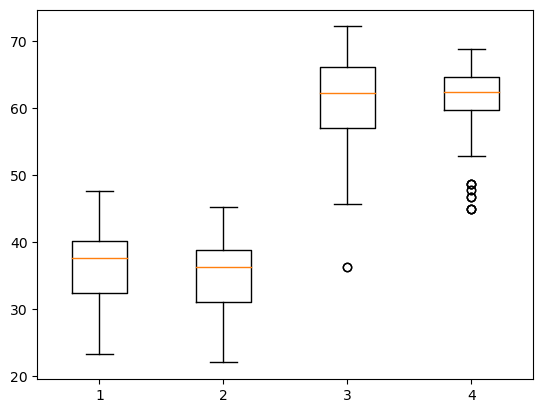

In [31]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot([Capomulin_Tumors,Ramicane_Tumors,Infubinol_Tumors,Ceftamin_Tumors])

## Line and Scatter Plots

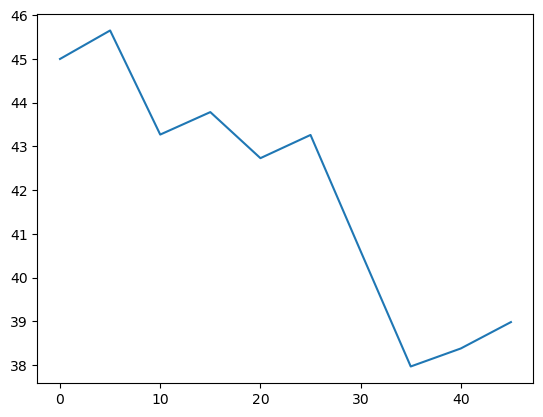

In [34]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_target = Final_Frame.loc[(Final_Frame['Mouse ID'] == 'b128')]
xvalues = mouse_target['Timepoint']
yvalues = mouse_target['Tumor Volume (mm3)_x']
plt.plot(xvalues,yvalues)

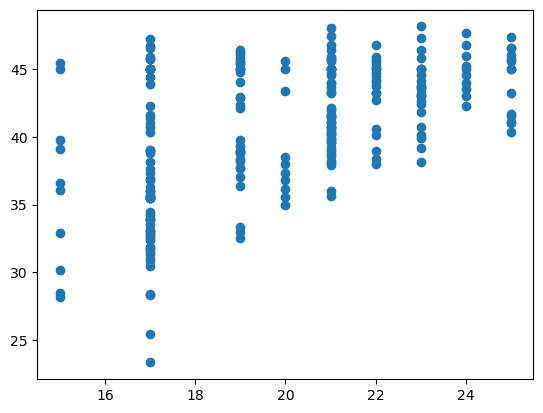

In [42]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
yvalues = Capomulin['Tumor Volume (mm3)_x']
xvalues = Capomulin['Weight (g)_x']
plt.scatter(Capomulin['Weight (g)_x'],Capomulin['Tumor Volume (mm3)_x'])

## Correlation and Regression

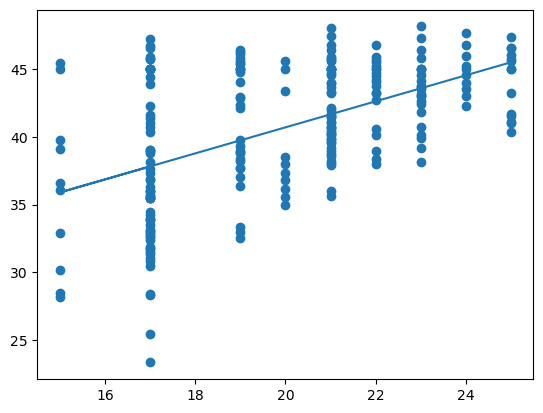

In [44]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr_coefficient = round(st.pearsonr(xvalues,yvalues)[0],2)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
plt.scatter(xvalues,yvalues)
plt.plot(xvalues,regress_values)